Sebastian Raschka, 2015, 2016
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/_ipynb_templates/math/num_permutations.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy,mlxtend

Sebastian Raschka 
last updated: 2016-06-26 

CPython 3.5.1
IPython 4.2.0

matplotlib 1.5.1
numpy 1.11.0
scipy 0.17.1
mlxtend 0.4.2.dev0


In [2]:
%matplotlib inline

# Principal Component Analysis

Implementation of Principal Component Analysis for dimensionality reduction

> from mlxtend.feature_extraction import PrincipalComponentAnalysis

## Overview

The sheer size of data in the modern age is not only a challenge for computer hardware but also a main bottleneck for the performance of many machine learning algorithms. The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

### PCA and Dimensionality Reduction

Often, the desired goal is to reduce the dimensions of a $d$-dimensional dataset by projecting it onto a $(k)$-dimensional subspace (where $k\;<\;d$) in order to increase the computational efficiency while retaining most of the information. An important question is "what is the size of $k$ that represents the data 'well'?"

Later, we will compute eigenvectors (the principal components) of a dataset and collect them in a projection matrix. Each of those eigenvectors is associated with an eigenvalue which can be interpreted as the "length" or "magnitude" of the corresponding eigenvector. If some eigenvalues have a significantly larger magnitude than others that the reduction of the dataset via PCA onto a smaller dimensional subspace by dropping the "less informative" eigenpairs is reasonable.

### A Summary of the PCA Approach

-  Standardize the data.
-  Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
-  Sort eigenvalues in descending order and choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues where $k$ is the number of dimensions of the new feature subspace ($k \le d$).
-  Construct the projection matrix $\mathbf{W}$ from the selected $k$ eigenvectors.
-  Transform the original dataset $\mathbf{X}$ via $\mathbf{W}$ to obtain a $k$-dimensional feature subspace $\mathbf{Y}$.


### References

- Pearson, Karl. "LIII. [On lines and planes of closest fit to systems of points in space.](http://www.tandfonline.com/doi/abs/10.1080/14786440109462720?journalCode=tphm17)" The London, Edinburgh, and Dublin Philosophical Magazine and Journal of Science 2.11 (1901): 559-572.

## Examples

### Example 1 - PCA on Iris

In [3]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import PrincipalComponentAnalysis

X, y = iris_data()
X = standardize(X)

pca = PrincipalComponentAnalysis(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

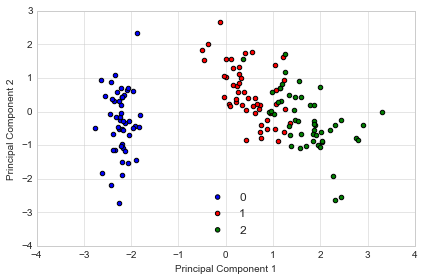

In [4]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
                        ('blue', 'red', 'green')):
        plt.scatter(X_pca[y==lab, 0],
                    X_pca[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

### Example 2 - Plotting the Variance Explained Ratio

In [5]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize

X, y = iris_data()
X = standardize(X)

pca = PrincipalComponentAnalysis(n_components=None)
pca.fit(X)
X_pca = pca.transform(X)

In [6]:
import numpy as np

tot = sum(pca.e_vals_)
var_exp = [(i / tot)*100 for i in sorted(pca.e_vals_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

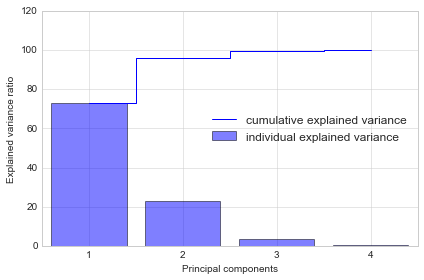

In [7]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.xticks(range(4))
    ax.set_xticklabels(np.arange(1, X.shape[1] + 1))
    plt.legend(loc='best')
    plt.tight_layout()

### Example 3 - PCA via SVD

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency. Another advantage of using SVD is that the results tend to be more numerically stable, since we can decompose the input matrix directly without the additional covariance-matrix step.

In [8]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import PrincipalComponentAnalysis

X, y = iris_data()
X = standardize(X)

pca = PrincipalComponentAnalysis(n_components=2,
                                 solver='svd')
pca.fit(X)
X_pca = pca.transform(X)

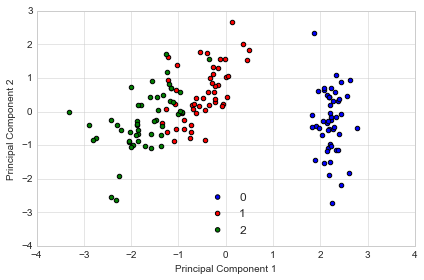

In [9]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
                        ('blue', 'red', 'green')):
        plt.scatter(X_pca[y==lab, 0],
                    X_pca[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

If we compare this PCA projection to the previous plot in example 1, we notice that they are mirror images of each other. Note that this is not due to an error in any of those two implementations, but the reason for this difference is that, depending on the eigensolver, eigenvectors can have either negative or positive signs.

For instance, if $v$ is an eigenvector of a matrix $\Sigma$, we have

$$\Sigma v = \lambda v,$$

where $\lambda$ is our eigenvalue

then $-v$ is also an eigenvector that has the same eigenvalue, since

$$\Sigma(-v) = -\Sigma v = -\lambda v = \lambda(-v).$$

## API

In [10]:
with open('../../api_modules/mlxtend.feature_extraction/PrincipalComponentAnalysis.md', 'r') as f:
    s = f.read()
print(s)

## PrincipalComponentAnalysis

*PrincipalComponentAnalysis(n_components=None, solver='eigen')*

Principal Component Analysis Class

**Parameters**

- `n_components` : int (default: None)

    The number of principal components for transformation.
    Keeps the original dimensions of the dataset if `None`.

- `solver` : str (default: 'eigen')

    Method for performing the matrix decomposition.
    {'eigen', 'svd'}

**Attributes**

- `w_` : array-like, shape=[n_features, n_components]

    Projection matrix

- `e_vals_` : array-like, shape=[n_features]

    Eigenvalues in sorted order.

- `e_vecs_` : array-like, shape=[n_features]

    Eigenvectors in sorted order.

### Methods

<hr>

*fit(X)*

Learn model from training data.

**Parameters**

- `X` : {array-like, sparse matrix}, shape = [n_samples, n_features]

    Training vectors, where n_samples is the number of samples and
    n_features is the number of features.

**Returns**

- `self` : object


<hr>

*transform(X)*

Apply the lin